In [ ]:
# ChatGPT : Please write code using keras model for price prediction.

'''
Certainly! Here is an example of how you might use Keras, a high-level neural networks API, to create a Multi-Layer Perceptron (MLP) model to predict a continuous value (e.g. price) based on some input features:

This code uses the Sequential class from Keras to create a model with a single fully-connected (or dense) layer with 50 units, and an input dimension of X_train.shape[1] which is the number of features in the data. An activation function relu is used in the first dense layer to introduce non-linearity in the model.

It then compiles the model with the mean squared error loss function and the Adam optimizer. The model is then fit to the training data using the fit method, with a batch size of 32 and number of epochs as 1000. After that it makes predictions on the test data using the predict method and calculates the mean squared error of the predictions to assess the model's performance.

Keep in mind that this is just a simple example, and you may need to adjust the number of layers, units, and other parameters depending on the specific requirements of your problem.
'''

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pandas import read_csv

import tensorflow as tf
import numpy as np

dataframe = read_csv('pollution@beijing_5years.csv', usecols = [6,7,8,10]) # TEMP 데이터 예측
print(dataframe)

dataset = dataframe.values
dataset = dataset.astype('float')
print(dataset)

print(dataset.shape)

       DEWP  TEMP    PRES     Iws
0       -21 -11.0  1021.0    1.79
1       -21 -12.0  1020.0    4.92
2       -21 -11.0  1019.0    6.71
3       -21 -14.0  1019.0    9.84
4       -20 -12.0  1018.0   12.97
...     ...   ...     ...     ...
43819   -23  -2.0  1034.0  231.97
43820   -22  -3.0  1034.0  237.78
43821   -22  -3.0  1034.0  242.70
43822   -22  -4.0  1034.0  246.72
43823   -21  -3.0  1034.0  249.85

[43824 rows x 4 columns]
[[ -21.    -11.   1021.      1.79]
 [ -21.    -12.   1020.      4.92]
 [ -21.    -11.   1019.      6.71]
 ...
 [ -22.     -3.   1034.    242.7 ]
 [ -22.     -4.   1034.    246.72]
 [ -21.     -3.   1034.    249.85]]
(43824, 4)


In [2]:
# load dataset
values = dataset
print(values)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
print(scaled_values)

#train_data, test_data = train_test_split(scaled_values, test_size = 0.2, shuffle = False)
train_data, test_data = train_test_split(values, test_size = 0.2, shuffle = False)
print(len(train_data), len(test_data))

# Select the column for y(label)
y_train = train_data[:, 1] # TEMP 데이터 예측
y_test = test_data[:, 1] # TEMP 데이터 예측

print(y_train)
print(y_test)
print(len(y_train), len(y_test))

[[ -21.    -11.   1021.      1.79]
 [ -21.    -12.   1020.      4.92]
 [ -21.    -11.   1019.      6.71]
 ...
 [ -22.     -3.   1034.    242.7 ]
 [ -22.     -4.   1034.    246.72]
 [ -21.     -3.   1034.    249.85]]
[[0.27941176 0.13114754 0.54545455 0.00229001]
 [0.27941176 0.1147541  0.52727273 0.00763907]
 [0.27941176 0.13114754 0.50909091 0.01069811]
 ...
 [0.26470588 0.26229508 0.78181818 0.41399641]
 [0.26470588 0.24590164 0.78181818 0.42086644]
 [0.27941176 0.26229508 0.78181818 0.4262155 ]]
35059 8765
[-11. -12. -11. ...   9.   8.   8.]
[ 7.  7.  7. ... -3. -4. -3.]
35059 8765


In [3]:
# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print(train_data.shape, y_train.shape)
print(test_data.shape, y_test.shape)

(35059, 4) (35059,)
(8765, 4) (8765,)


In [4]:
# Train the model
history = model.fit(train_data, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
1096/1096 [==============================] - 2s 2ms/step - loss: 874.0278
Epoch 2/20
1096/1096 [==============================] - 2s 1ms/step - loss: 4.4967
Epoch 3/20
1096/1096 [==============================] - 2s 1ms/step - loss: 0.3653
Epoch 4/20
1096/1096 [==============================] - 2s 1ms/step - loss: 0.0390
Epoch 5/20
1096/1096 [==============================] - 2s 1ms/step - loss: 0.0249
Epoch 6/20
1096/1096 [==============================] - 2s 1ms/step - loss: 0.0201
Epoch 7/20
1096/1096 [==============================] - 2s 1ms/step - loss: 0.0421
Epoch 8/20
1096/1096 [==============================] - 2s 1ms/step - loss: 0.3138
Epoch 9/20
1096/1096 [==============================] - 2s 2ms/step - loss: 0.3482
Epoch 10/20
1096/1096 [==============================] - 2s 2ms/step - loss: 0.3492
Epoch 11/20
1096/1096 [==============================] - 2s 2ms/step - loss: 0.3483
Epoch 12/20
1096/1096 [==============================] - 2s 2ms/step - loss: 0.3058

dict_keys(['loss'])


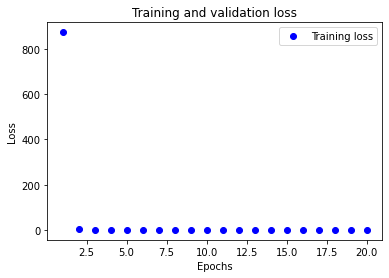

In [5]:
import matplotlib.pyplot as plt

print(history.history.keys())
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

# bo = 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss') # plot x and y using blue circle markers
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [6]:
# Make predictions on the test data
predictions = model.predict(test_data)

print(predictions)
print(y_test)

value_error = np.absolute(predictions[0] - y_test[0])

value_percent = 100 - (value_error * 100 / y_test[0])

print(value_error, "error,", value_percent, "% accuracy")

274/274 [==============================] - 1s 2ms/step
[[ 6.984759 ]
 [ 6.9811196]
 [ 6.980948 ]
 ...
 [-3.020887 ]
 [-4.020471 ]
 [-3.0193992]]
[ 7.  7.  7. ... -3. -4. -3.]
[0.01524115] error, [99.78227] % accuracy


In [7]:
# Make predictions on the test data
predictions = model.predict(test_data)

# Calculate the mean squared error of the predictions
mse = ((predictions - y_test) ** 2).mean()

print("Mean squared error:", mse)

274/274 [==============================] - 0s 2ms/step
Mean squared error: 271.5470693300159
